# 鼓音色特征分析

需要用到的库有scipy, sklearn, numpy, matplotlib, librosa, pyaudio，可以通过pip下载

你需要将你的答案正确填写在下列代码中的“你的代码”位置，以下是一个示例：

```python
# 条件：你需要正确完成此处描述的功能，生成正确的结果，存储到给定的对象中
# example：这里存放你生成的结果
example = None
# =========你的代码=========
<此处填写你需要完成的代码>
# ========================
```

In [33]:
import pyaudio
import wave
import numpy as np
import time
from tkinter import TclError
import matplotlib.pyplot as plt
import librosa
from scipy.fftpack import fft
import pandas as pd
import os
import sys
import json
import math
from sklearn import neighbors

# 第一部分 加载鼓音色数据集

需要用到的工具函数：包括读取数据集、获取特征和分类标签

In [7]:
filename = './features_1.json'
data = json.load(open(filename))

for path, features_dict in data.items():
    print(path)

./data/close-hat/hihat - close - 2.wav
./data/close-hat/hihat - close - 3.wav
./data/close-hat/hihat - close - 4.wav
./data/close-hat/hihat - close - 5.wav
./data/close-hat/hihat - close - 6.wav
./data/close-hat/hihat - close - 7.wav
./data/close-hat/hihat - closed - 2.wav
./data/close-hat/hihat - closed - 3.wav
./data/close-hat/hihat - closed - 4.wav
./data/close-hat/hihat - closed - 5.wav
./data/close-hat/hihat - closed - 6.wav
./data/close-hat/hihat - closed - 7.wav
./data/close-hat/hihat - closed - 8.wav
./data/kick/Kick 1 Room.wav
./data/kick/Kick 10 Room.wav
./data/kick/Kick 2 Room.wav
./data/kick/Kick 3 Room.wav
./data/kick/Kick 4 Room.wav
./data/kick/Kick 5 Room.wav
./data/kick/Kick 6 Room.wav
./data/kick/Kick 7 Room.wav
./data/kick/Kick 8 Room.wav
./data/kick/Kick 9 Room.wav
./data/snare/Snare Garage 1 V3.wav
./data/snare/Snare Garage 1 V4.wav
./data/snare/Snare Garage 1 V5.wav
./data/snare/Snare Garage 1 V6.wav
./data/snare/Snare Garage 1 V7.wav
./data/snare/Snare Garage 2 V1

In [14]:
def read_data_1():
    filename = '.\\features_1.json'
    data = json.load(open(filename))

    feature_names = sorted(list(data.values())[0])

    class_names = set()
    for path, features_dict in data.items():
        class_names.add(path.split('/')[-2])
    class_names = sorted(class_names)

    sample_names = []
    features = []
    classes = []
    for path, features_dict in data.items():
        sample_names.append(path.split('/')[-1])
        classes.append(class_names.index(path.split('/')[-2]))

        feature_vector = []
        for feature_key in feature_names:
            feature_value = features_dict[feature_key]
            if feature_value > 1000000.:
                feature_value = 1000000.
            if feature_value < -1000000.:
                feature_value = -1000000.
            if math.isnan(feature_value):
                feature_value = 0
            feature_vector.append(feature_value)

        features.append(feature_vector)
    return features, classes, sample_names, feature_names, class_names

features_1, classes_1, sample_names_1, feature_names_1, class_names_1 = read_data_1()

features = []
classes = []

for i in range(len(features_1)):
    class_id = classes_1[i]
    if class_id in [0, 3]:
        classes.append(classes_1[i])
        zcrs1 = features_1[i][3]
        cent2 = features_1[i][0]
        features.append([zcrs1, cent2])

以上返回的数据集包含`classes`类别数组和`features`特征数组。`classes`和`features`的长度是相等的，`len(classes)=len(features)=样本个数`。

`classes`和`features`下标相同的元素代表同一个样本的分类和特征，例如：第i个样本的特征为`features[i]`，分类id为`classes[i]`

`class_names_1`列表为类别id和类别名称的对应关系，内容为`[0:'close-hat', 1:'kick', 2:'snare', 3:'tom']`，我们选择两个分类使用：一个是id为0的close-hat（闭合的踩镲），一个是id为3的tom（中鼓）。

`classes`包含分类的类别id，`features`包含每个样本的特征，每个样本的特征为`[zcrs_max, cent_max]`，分别为样本过零率最大值和频谱质心的最大值

In [16]:
print('features: ', features)
print('classes', classes)
print('class_name_1', class_names_1)

features:  [[0.25439453125, 5516.4580032534495], [0.3681640625, 5490.601257198063], [0.337890625, 5352.68047389478], [0.2919921875, 5336.766295981619], [0.30517578125, 5289.036366374137], [0.193359375, 5244.629253486402], [0.29296875, 5623.7659549621], [0.35546875, 5338.70141195639], [0.40234375, 5534.624111796196], [0.46044921875, 5667.873721573634], [0.46875, 5764.765050822283], [0.42724609375, 5665.266826804815], [0.48828125, 5721.607529192007], [0.0322265625, 2151.831411477686], [0.02392578125, 2370.5585954217368], [0.02685546875, 2490.1321606766824], [0.03564453125, 3801.8154882684476], [0.06689453125, 3576.86491428312], [0.03466796875, 2544.871084198307], [0.046875, 2511.5392874996087], [0.033203125, 2889.4074561680122], [0.03271484375, 3030.1333641026104], [0.04736328125, 3089.1199470143483], [0.02978515625, 2335.6373727027867], [0.021484375, 1751.034211035683], [0.01416015625, 1863.902143068636], [0.02587890625, 2089.526381590321]]
classes [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

画出数据集分布，分类为tom的样本标记为红色三角形，close-hat的样本标记为蓝色正方形

27
[0.0322265625, 0.02392578125, 0.02685546875, 0.03564453125, 0.06689453125, 0.03466796875, 0.046875, 0.033203125, 0.03271484375, 0.04736328125, 0.02978515625, 0.021484375, 0.01416015625, 0.02587890625]
[2151.831411477686, 2370.5585954217368, 2490.1321606766824, 3801.8154882684476, 3576.86491428312, 2544.871084198307, 2511.5392874996087, 2889.4074561680122, 3030.1333641026104, 3089.1199470143483, 2335.6373727027867, 1751.034211035683, 1863.902143068636, 2089.526381590321]
[0.25439453125, 0.3681640625, 0.337890625, 0.2919921875, 0.30517578125, 0.193359375, 0.29296875, 0.35546875, 0.40234375, 0.46044921875, 0.46875, 0.42724609375, 0.48828125]
[5516.4580032534495, 5490.601257198063, 5352.68047389478, 5336.766295981619, 5289.036366374137, 5244.629253486402, 5623.7659549621, 5338.70141195639, 5534.624111796196, 5667.873721573634, 5764.765050822283, 5665.266826804815, 5721.607529192007]


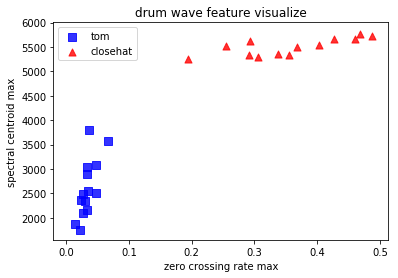

In [50]:
%matplotlib inline

# 你需要填充以下4个数组：
tom_zcrs_max = [] # 分类为tom样本的“过零率最大值”特征值集合
tom_cent_max = [] # 分类为tom样本的“频谱质心最大值”特征值集合
closehat_zcrs_max = [] # 分类为close-hat样本的“过零率最大值”特征值集合
closehat_cent_max = [] # 分类为close-hat样本的“频谱质心最大值”特征值集合

# sample_count为样本数量
# features的shape为(sample_count, 2)，存储格式为：
# [
#     [样本1的过零率最大值，样本1的频谱质心最大值],
#     [样本2的过零率最大值，样本2的频谱质心最大值],
#     ......
# ]
# classes的shape为(sample_count, )，存储格式为：
# [
#     样本1标签，
#     样本2标签，
#     ...
# ]
# 你需要正确将每个样本的每个特征正确归类到以上四个数组中
# 例：tom_zcrs_max = [分类为tom的样本1过零率最大值, 分类为tom的样本2过零率最大值, ....]

# =========你的代码=========
print(len(features))
for i in range(len(features)):
    if (classes[i] ==3 ):
        tom_zcrs_max.append(features[i][0])
        tom_cent_max.append(features[i][1])
    else: 
        closehat_zcrs_max.append(features[i][0])
        closehat_cent_max.append(features[i][1])
print(tom_zcrs_max)
print(tom_cent_max)
print(closehat_zcrs_max)
print(closehat_cent_max)
# ========================

# 使用“过零率最大值”为x轴，“频谱质心最大值”为y轴画图

fig, ax = plt.subplots()
ax.set_title('drum wave feature visualize')
ax.set_xlabel('zero crossing rate max')
ax.set_ylabel('spectral centroid max')
ax.scatter(tom_zcrs_max,tom_cent_max,label='tom',c='b',marker='s',s=50,alpha=0.8) # 将tom样本根据特征画在散点图上
ax.scatter(closehat_zcrs_max,closehat_cent_max,label='closehat',c='r', marker='^', s=50, alpha=0.8) # 将close-hat样本根据特征画在散点
plt.legend()
plt.show()

使用knn对数据集分类，其中输入的样本特征为features，样本分类标签为classes

In [54]:
# 构建最大近邻数为5的knn分类器
# 你需要返回以下对象：
# knn：KNN分类器对象

knn = None
# =========你的代码=========
knn = neighbors.KNeighborsClassifier() 
# ========================

# 训练knn分类器
knn.fit(features, classes)

# 使用训练集预测分类结果
# 你需要返回以下对象：
# predicted：输入为训练集特征features，在knn分类器的预测结果
predicted = None
# =========你的代码=========
predicted=knn.predict(features)
# ========================
accuracy = np.mean(predicted==classes)
print(accuracy)

1.0


# 第二部分 使用麦克风采集单个音频样本并分析特征

以下为设置使用麦克风采样音频的参数

In [134]:
CHUNK = 4 * 1024                     # 缓冲区可容纳的帧数
FORMAT = pyaudio.paInt16             # 采样数据的格式（16位int型）
CHANNELS = 1                         # 声道数
RATE = 44100                        # 麦克风采样的实际帧率（每秒采样的帧数）
RECORD_SECONDS = 0.2          # 采样秒数
CHUNK_COUNT = int(RATE / CHUNK * RECORD_SECONDS)    # 给定的采样秒数下，使用的缓冲区个数
NUM_FRAMES_IN_ALL_CHUNKS = CHUNK_COUNT * CHUNK  # 给定的采样秒数下，采集的帧数

使用麦克风采样一个chunk，观察每次采样的采样值

* recording
* done recording


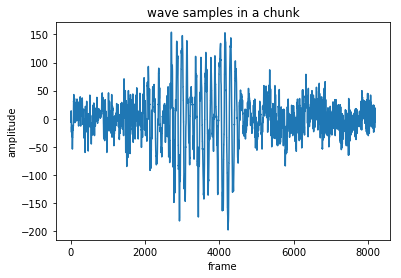

In [118]:
print("* recording")

# 需要构造PyAudio类的实例，通过该实例打开流，读取一个缓冲区的采样值，关闭流
# 你需要正确生成这个对象：
# data：缓冲区内的采样数据

data = ""

# =========你的代码=========
p=pyaudio.PyAudio()
#CHUNK = 4096 #缓冲区大小
#FORMAT = pyaudio.paInt16
#CHANNELS = 2
#RATE = 44100 #采样率
#RECORD_SECONDS = 2
stream=p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
data=stream.read(CHUNK)
stream.stop_stream()
stream.close()
p.terminate()
# ========================

print("* done recording")

audio_data = np.frombuffer(data, dtype=np.int16)
fig, ax = plt.subplots()
ax.set_title('wave samples in a chunk')
ax.set_xlabel('frame')
ax.set_ylabel('amplitude')
ax.plot(audio_data, "-")
plt.show()

### 使用librosa提取上述样本的过零率和频谱质心

In [94]:
audio_data = audio_data.astype(np.float32)
# audio_data为np.array对象，使用librosa库从该段音频样本中提取过零率和频谱质心特征
# 注意：获取频谱质心函数中的采样率应为RATE
# 你需要正确生成这个对象：
# zcrs：使用librosa库从audio_data获取的过零率数据
# cent：使用librosa库从audio_data获取的频谱质心数据

zcrs = None
cent = None

# =========你的代码=========
cent=librosa.feature.spectral_centroid(y=audio_data)
zcrs=librosa.feature.zero_crossing_rate(audio_data,frame_length=CHUNK)
# ========================

print("过零率： ", zcrs)
print("频谱质心： ", cent)
# 取得过零率和频谱质心的最大值
zcrs_max = np.max(zcrs[0])
cent_max = np.max(cent[0])
print("过零率最大值：", zcrs_max)
print("频谱质心最大值：", cent_max)

过零率：  [[0.0078125  0.01123047 0.01464844 0.01635742 0.01928711 0.02050781
  0.02636719 0.03442383 0.04736328 0.05834961 0.0690918  0.08251953
  0.09326172 0.09082031 0.08398438 0.07299805 0.05737305]]
频谱质心：  [[1100.50133987 1047.01291484 1098.52626154 1137.07391785  991.96356624
   857.80005196  815.88206017  785.12051302  793.33993079 1006.4508516
  1695.97989617 2098.36615947 2208.84617835 2231.1309305  2296.25760356
  2380.22341157 2376.61623187]]
过零率最大值： 0.09326171875
频谱质心最大值： 2380.223411570525


使用上述训练的knn模型对本次采样进行分类

In [95]:
predicted = knn.predict([[zcrs_max, cent_max]])
print(class_names_1[predicted[0]])

tom


# 第三部分：使用麦克风连续采样并分析特征

修改matplotlib的显示方式，改为独立窗口显示

In [108]:
from IPython.display import display, clear_output

In [124]:
%matplotlib tk

设置图表的显示格式，包括正确的坐标轴、标签和阈值

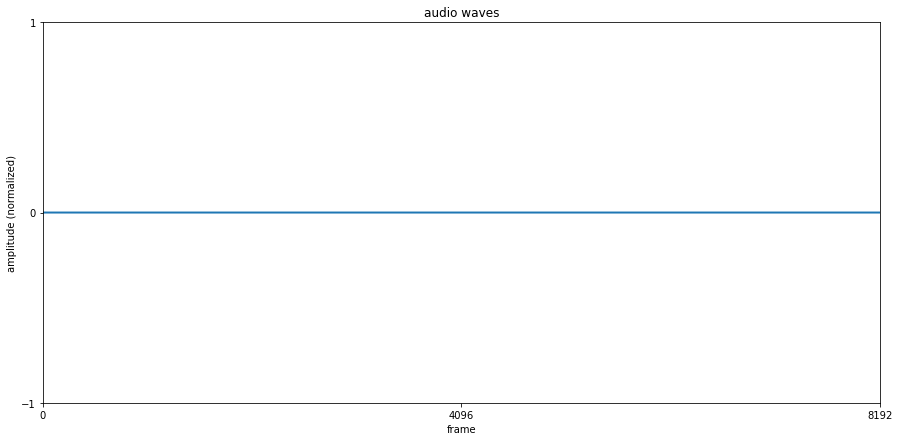

In [122]:
%matplotlib tk

# create matplotlib figure and axes
fig, ax1 = plt.subplots(1, figsize=(15, 7))

# variable for plotting
x = np.arange(0, NUM_FRAMES_IN_ALL_CHUNKS, 1) # 样本数据

# create a line object with random data
line, = ax1.plot(x, np.random.rand(NUM_FRAMES_IN_ALL_CHUNKS), '-', lw=2)

# basic formatting for the axes
ax1.set_title('audio waves')
ax1.set_xlabel('frame')
ax1.set_ylabel('amplitude (normalized)')
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, NUM_FRAMES_IN_ALL_CHUNKS)
plt.setp(ax1, xticks=[0, NUM_FRAMES_IN_ALL_CHUNKS/2, NUM_FRAMES_IN_ALL_CHUNKS], yticks=[-1, 0, 1])

# show the plot
plt.show(block=False)

audio_data = np.zeros([NUM_FRAMES_IN_ALL_CHUNKS], dtype=np.int16)
line.set_ydata(audio_data)

每隔`RECORD_SECONDS`秒采集一段音频，对该样本绘制其波形及频谱，并用knn模型进行分类（是否为tom低音鼓或close-hat镲）

In [136]:
%matplotlib tk

# create matplotlib figure and axes
fig, ax1 = plt.subplots(1, figsize=(15, 7))

# variable for plotting
x = np.arange(0, NUM_FRAMES_IN_ALL_CHUNKS, 1) # 样本数据

# create a line object with random data
line, = ax1.plot(x, np.random.rand(NUM_FRAMES_IN_ALL_CHUNKS), '-', lw=2)

# basic formatting for the axes
ax1.set_title('audio waves')
ax1.set_xlabel('frame')
ax1.set_ylabel('amplitude (normalized)')
ax1.set_ylim(-1024, 1024)
ax1.set_xlim(0, NUM_FRAMES_IN_ALL_CHUNKS)
plt.setp(ax1, xticks=[0, NUM_FRAMES_IN_ALL_CHUNKS/2, NUM_FRAMES_IN_ALL_CHUNKS], yticks=[-1024, 0, 1024])

# show the plot
plt.show(block=False)

audio_data = np.zeros([NUM_FRAMES_IN_ALL_CHUNKS], dtype=np.int16)
# line.set_ydata(audio_data)

# 需要构造PyAudio类的实例，和生成输入流
# 注意：需要正确设置流的缓冲区大小为CHUNK，即缓冲区内存放的帧数
# 你需要正确生成这个对象：
# p：pyaudio实例
# stream：输入流

p = None
stream = None

# =========你的代码=========
p=pyaudio.PyAudio()
stream=p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
#data=stream.read(CHUNK)
# ========================


display('stream started')

# 使用while循环不断从stream中读取样本，直到关闭图表位置
# 你可以在break的位置观察到：关闭matplotlib生成的图表会抛出TclError异常

while True:

    # 由于每次从流中获取数据是以缓冲区为单位，RECORD_SECONDS时间内会获取不止一个chunk大小的样本
    # 将每次从缓冲区取出的数据放入frames数组中，随后将它们拼接起来
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK, exception_on_overflow = False)
        data_np =  np.frombuffer(data, dtype=np.int16)
        frames.append(data_np)

    audio_data = np.hstack(frames)
    
    # 将样本归一化到[0, 1]范围内
    audio_data_norm = audio_data / float(np.amax(np.abs(audio_data)))
    
    
    
    # 画图
    line.set_ydata(audio_data)
    
    audio_data = audio_data.astype(np.float32)
    # audio_data包含了在设定的时间范围内获取的音频样本
    # 需要对该样本使用librosa库进行特征提取
    # 你需要正确生成这个对象：
    # zcrs：使用librosa库从audio_data获取的过零率数据
    # cent：使用librosa库从audio_data获取的频谱质心数据
    zcrs = []
    cent = []
    # =========你的代码=========
    cent=librosa.feature.spectral_centroid(y=audio_data,sr=44100)
    zcrs=librosa.feature.zero_crossing_rate(audio_data,frame_length=CHUNK)   
    # ========================
    
    # 输出结果到下方标准输出
    clear_output()
    
    display(audio_data_norm.shape)
    
    display("zcrs: " + str(zcrs))
    display("cent: " + str(cent))
    
    zcrs_max = np.max(zcrs[0]) # 过零率的最大值
    cent_max = np.max(cent[0]) # 频率质心的最大值
    display("zcrs_max: " + str(zcrs_max))
    display("cent_max: " + str(cent_max))
    
    # 使用knn分类器对上述样本的两个特征进行分类
    # 你需要正确生成这个对象：
    # predicted：使用knn分类器返回预测标签
    predicted = [None]
    # =========你的代码=========
    predicted = knn.predict([[zcrs_max, cent_max]])
    
    # ========================
    display("predict:"+ class_names_1[predicted[0]])
    
#     #  更新图表
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
    
    # 关闭图表，中断循环
    except TclError:
        display('stream stopped')
        break

(172032,)

'zcrs: [[0.01757812 0.02075195 0.02368164 0.02709961 0.02954102 0.02709961\n  0.02319336 0.02270508 0.02270508 0.02416992 0.02587891 0.02832031\n  0.03271484 0.03027344 0.02905273 0.02612305 0.02197266]]'

'cent: [[1313.08360512 1294.37482863 1305.59758088 1225.68081981 1182.88924061\n  1245.28486908 1305.41199026 1472.86978234 1696.33737059 1398.05417642\n  1386.6740607  1558.73277524 1687.41544112 1734.83660127 1731.3353275\n  1770.60002557 1838.0692488 ]]'

'zcrs_max: 0.03271484375'

'cent_max: 1838.0692487970384'

'predict:tom'

'stream stopped'

# 总结

恭喜你完成了以上的任务！如果你对音频特征还有更多兴趣的话，可以试试以下的事情：

- 使用傅立叶转换获取音频样本的频谱图
- 使用librosa提取不同的特征
- 使用不同的分类器对你获取的特征进行分类